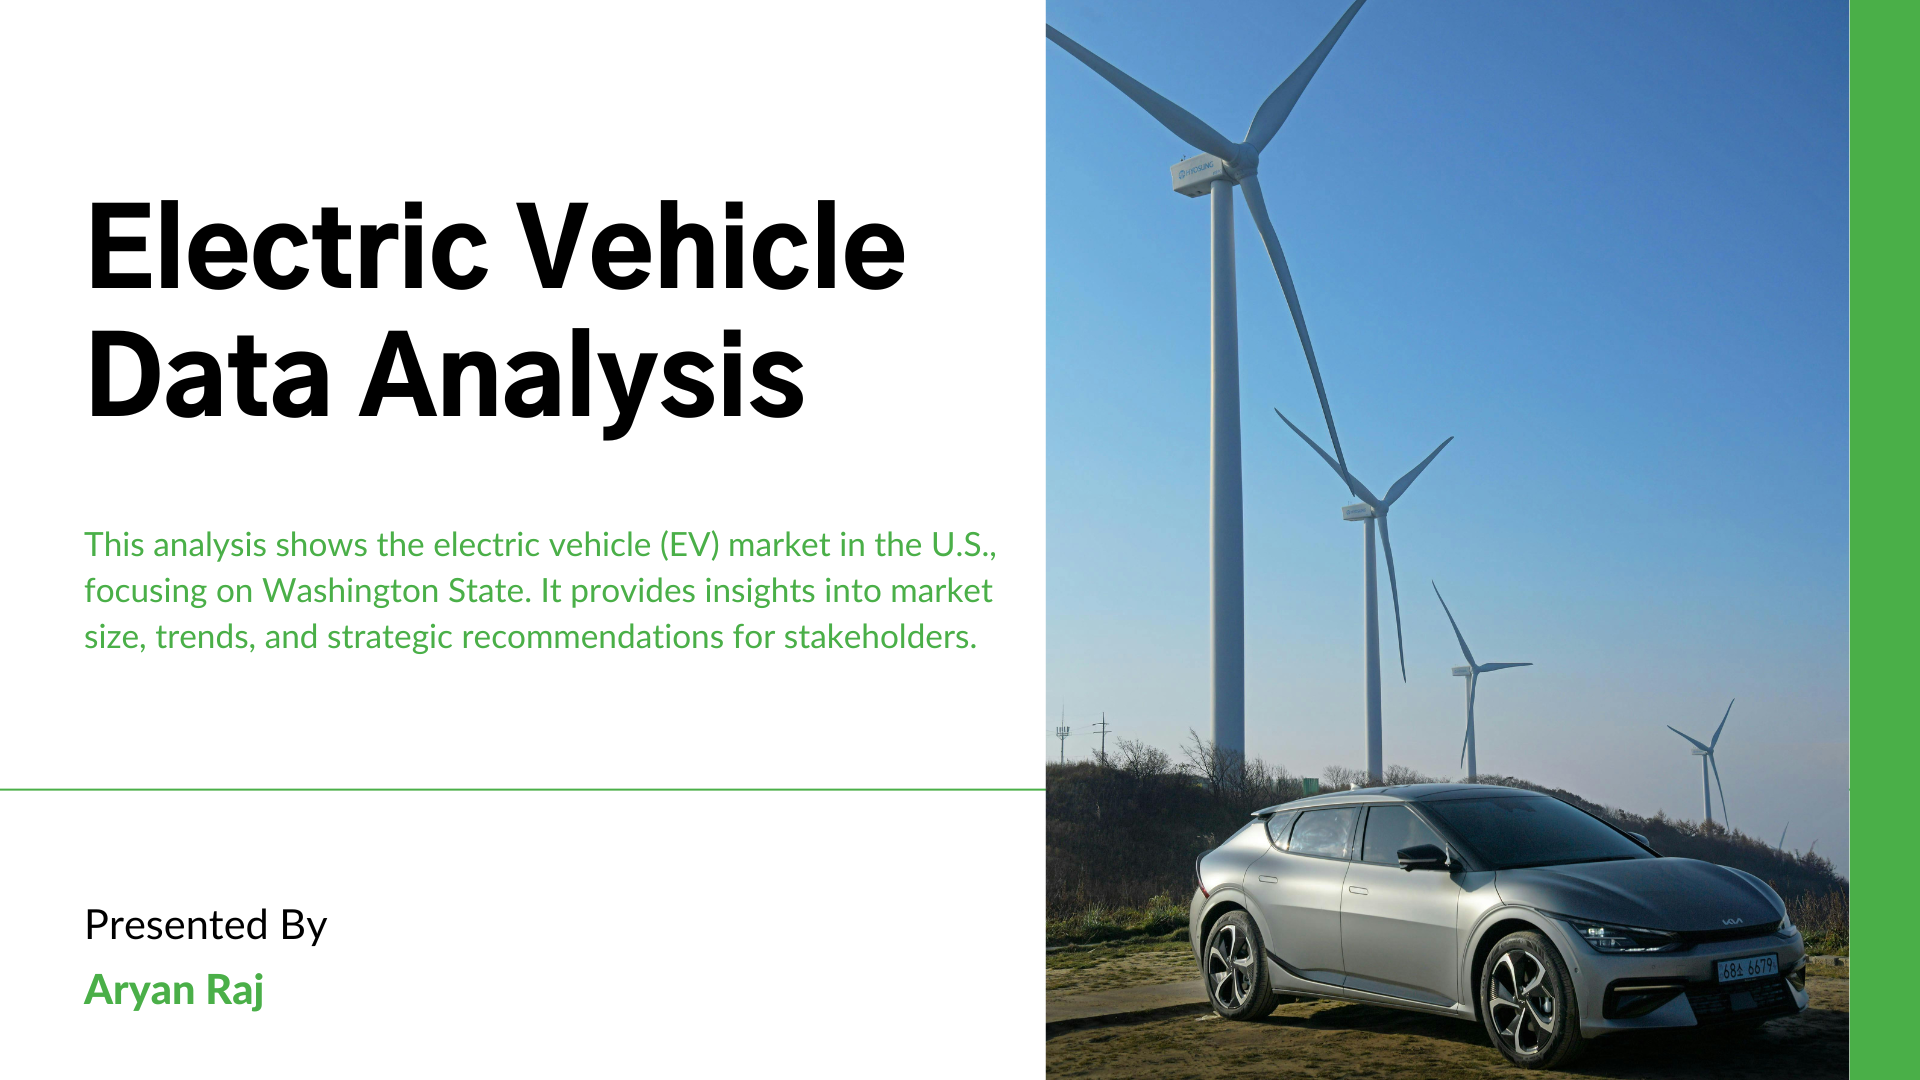

#Problem Statement/Object

##**Electric Vehicle Data Analysis**
Market Size Analysis is the process of estimating the potential sales for a product or service within a particular market segment. In the context of electric vehicles (EVs), it involves assessing the total volume of EV registrations to understand the growth of the market, forecast future trends, and help stakeholders make informed decisions regarding production, infrastructure development, and policy-making.

**The provided dataset contains the following columns, each representing different aspects of the electric vehicle (EV) population in the United States:**

•	**VIN (1-10):** Partial Vehicle Identification Number.

•	**County**: The county in which the vehicle is registered.

•	**City**: The city in which the vehicle is registered.

•	**State**: The state in which the vehicle is registered. It appears that this dataset may be focused on Washington (WA) state.

•	**Postal Code**: The postal code where the vehicle is registered.

•	**Model Year**: The year of the vehicle model

•	**Make**: The manufacturer of the vehicle.

•	**Model**: The model of the vehicle.

•	**Electric Vehicle Type**: The type of electric vehicle, e.g., Battery Electric Vehicle (BEV).

•	**Clean Alternative Fuel Vehicle (CAFV) Eligibility**: Eligibility status for clean alternative fuel vehicle programs.

•	**Electric Range**: The maximum range of the vehicle on a single charge (in miles).

•	Base MSRP: The Manufacturer’s Suggested Retail Price.

•	**Legislative District**: The legislative district where the vehicle is registered.

•	**DOL Vehicle ID**: Department of Licensing Vehicle Identification.

•	**Vehicle Location**: Geographic coordinates of the vehicle location.

•	**Electric Utility**: The electric utility service provider for the vehicle’s location.

•	**2020 Census Tract**: The census tract for the vehicle’s location.


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
data =pd.read_csv("/content/drive/MyDrive/BootCamp/EV Project/6-Electric_Vehicle_Population_Data New.csv")
df=data

<ipython-input-2-e61b9b7624f6>:8: DtypeWarning: Columns (10,12) have mixed types. Specify dtype option on import or set low_memory=False.
  data =pd.read_csv("/content/drive/MyDrive/BootCamp/EV Project/6-Electric_Vehicle_Population_Data New.csv")


#**Basic Steps**

##1-	Display the top 5 rows.

In [3]:
data.head()

VIN (1-10)     County       City State  Postal Code  Model Year   Make  \
0  5YJYGDEE1L       King    Seattle    WA      98122.0        2020  TESLA   
1  7SAYGDEE9P  Snohomish    Bothell    WA      98021.0        2023  TESLA   
2  5YJSA1E4XK       King    Seattle    WA      98109.0        2019  TESLA   
3  5YJSA1E27G       King   Issaquah    WA      98027.0        2016  TESLA   
4  5YJYGDEE5M     Kitsap  Suquamish    WA      98392.0        2021    NaN   

     Model           Electric Vehicle Type  \
0  MODEL Y  Battery Electric Vehicle (BEV)   
1  MODEL Y  Battery Electric Vehicle (BEV)   
2  MODEL S  Battery Electric Vehicle (BEV)   
3  MODEL S  Battery Electric Vehicle (BEV)   
4  MODEL Y  Battery Electric Vehicle (BEV)   

   Clean Alternative Fuel Vehicle (CAFV) Eligibility Electric Range  \
0            Clean Alternative Fuel Vehicle Eligible            291   
1  Eligibility unknown as battery range has not b...              0   
2                                                NaN            270   
3            Clean Alternative Fuel Vehicle Eligible            210   
4  Eligibility unknown as battery range has not b...              0   

   Base MSRP Legislative District  DOL Vehicle ID  \
0          0                   37       125701579   
1          0                    1       244285107   
2          0                   36       156773144   
3          0                    5       165103011   
4          0                   23       205138552   

                Vehicle Location  \
0   POINT (-122.30839 47.610365)   
1  POINT (-122.179458 47.802589)   
2   POINT (-122.34848 47.632405)   
3   POINT (-122.03646 47.534065)   
4   POINT (-122.55717 47.733415)   

                                Electric Utility  2020 Census Tract  
0   CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA)       5.303301e+10  
1                         PUGET SOUND ENERGY INC       5.306105e+10  
2   CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA)       5.303301e+10  
3  PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)       5.303303e+10  
4                         PUGET SOUND ENERGY INC       5.303594e+10

**Output:**

The output of data.head() presents the initial rows of the DataFrame

##2-	Display the last 5 rows

In [4]:
data.tail()

VIN (1-10)  County           City State  Postal Code  Model Year  \
177861  7SAYGDEE3N  Pierce    Bonney Lake    WA      98391.0        2022   
177862  KM8K23AG1P   Mason        Shelton    WA      98584.0        2023   
177863  5YJYGDEE6M   Grant         Quincy    WA      98848.0        2021   
177864  WVGKMPE27M    King  Black Diamond    WA      98010.0        2021   
177865  5YJ3E1EA8M  Pierce         Tacoma    WA      98422.0        2021   

              Make          Model           Electric Vehicle Type  \
177861       TESLA        MODEL Y  Battery Electric Vehicle (BEV)   
177862     HYUNDAI  KONA ELECTRIC  Battery Electric Vehicle (BEV)   
177863       TESLA        MODEL Y  Battery Electric Vehicle (BEV)   
177864  VOLKSWAGEN           ID.4  Battery Electric Vehicle (BEV)   
177865       TESLA        MODEL 3  Battery Electric Vehicle (BEV)   

        Clean Alternative Fuel Vehicle (CAFV) Eligibility Electric Range  \
177861  Eligibility unknown as battery range has not b...              0   
177862  Eligibility unknown as battery range has not b...              0   
177863  Eligibility unknown as battery range has not b...              0   
177864  Eligibility unknown as battery range has not b...              0   
177865  Eligibility unknown as battery range has not b...              0   

        Base MSRP Legislative District  DOL Vehicle ID  \
177861          0                 31.0       195224452   
177862          0                 35.0       228454180   
177863          0                 13.0       168797219   
177864          0                  5.0       182448801   
177865          0                 27.0       211464683   

                       Vehicle Location  \
177861     POINT (-122.183805 47.18062)   
177862    POINT (-123.105305 47.211085)   
177863  POINT (-119.8493873 47.2339933)   
177864     POINT (-122.00451 47.312185)   
177865      POINT (-122.38578 47.28971)   

                                         Electric Utility  2020 Census Tract  
177861      PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)       5.305307e+10  
177862  BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...       5.304596e+10  
177863                           PUD NO 2 OF GRANT COUNTY       5.302501e+10  
177864      PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)       5.303303e+10  
177865  BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...       5.305394e+10

**Output:**
The output of data.tail() presents the end rows of the DataFrame

##3-	Check the shape of dataset.

In [ ]:
shape=data.shape
print(shape)

(177866, 17)


**Output:**


The dataset's shape(data.shape)
, as reported, indicates its dimensionality. For instance, if the dataset contains 1000 rows and 15 columns, it is conveyed as (1000, 15). This succinct representation denotes the number of observations (rows) and variables (columns) within the dataset.

##4-	Check the datatypes of each feature.

In [ ]:
dt= data.dtypes
print(dt)

VIN (1-10)                                            object
County                                                object
City                                                  object
State                                                 object
Postal Code                                          float64
Model Year                                             int64
Make                                                  object
Model                                                 object
Electric Vehicle Type                                 object
Clean Alternative Fuel Vehicle (CAFV) Eligibility     object
Electric Range                                        object
Base MSRP                                              int64
Legislative District                                  object
DOL Vehicle ID                                         int64
Vehicle Location                                      object
Electric Utility                                      object
2020 Census Tract       

**Output:**

The output displays the data types of each column in a tabular format, with column names on the left and their corresponding data types on the right. For example:

##5-	Check the Statistical summary

In [ ]:
s=data.describe()
print(s)

         Postal Code     Model Year      Base MSRP  DOL Vehicle ID  \
count  177861.000000  177866.000000  177866.000000    1.778660e+05   
mean    98172.453506    2020.515512    1073.109363    2.202313e+08   
std      2442.450668       2.989384    8358.624956    7.584987e+07   
min      1545.000000    1997.000000       0.000000    4.385000e+03   
25%     98052.000000    2019.000000       0.000000    1.814743e+08   
50%     98122.000000    2022.000000       0.000000    2.282522e+08   
75%     98370.000000    2023.000000       0.000000    2.548445e+08   
max     99577.000000    2024.000000  845000.000000    4.792548e+08   

       2020 Census Tract  
count       1.778610e+05  
mean        5.297672e+10  
std         1.578047e+09  
min         1.001020e+09  
25%         5.303301e+10  
50%         5.303303e+10  
75%         5.305307e+10  
max         5.603300e+10  


**Output:**


The code provided utilizes the describe() function to generate summary statistics for the numerical columns in the dataset.

The output displays various descriptive statistics for each numerical column, including count, mean, standard deviation, minimum, 25th percentile (1st quartile), median (50th percentile), 75th percentile (3rd quartile), and maximum

##6-	Check the null values

In [ ]:
missing_values= data.isnull().sum()
print(missing_values)

VIN (1-10)                                             0
County                                                 5
City                                                   5
State                                                  0
Postal Code                                            5
Model Year                                             0
Make                                                   7
Model                                                  4
Electric Vehicle Type                                  6
Clean Alternative Fuel Vehicle (CAFV) Eligibility      2
Electric Range                                         3
Base MSRP                                              0
Legislative District                                 389
DOL Vehicle ID                                         0
Vehicle Location                                       9
Electric Utility                                       5
2020 Census Tract                                      5
dtype: int64


**Output:**

The provided code calculates the number of missing values (null values) in each column of the dataset and prints the results.

The output displays the count of missing values for each column in the dataset

##7-	Check the duplicate values

In [ ]:
du=data[data.duplicated()]
print(du)

Empty DataFrame
Columns: [VIN (1-10), County, City, State, Postal Code, Model Year, Make, Model, Electric Vehicle Type, Clean Alternative Fuel Vehicle (CAFV) Eligibility, Electric Range, Base MSRP, Legislative District, DOL Vehicle ID, Vehicle Location, Electric Utility, 2020 Census Tract]
Index: []


**Output:**


The provided code identifies duplicate rows in the dataset and prints them.

The output indicates that there are no duplicate rows in the dataset. It returns an empty DataFrame, implying that each row in the dataset is unique.

This information suggests that there are no identical observations present in the dataset, which can be beneficial for ensuring data integrity and avoiding redundancy in subsequent analyses

##8-	Check the anomalies or wrong entries

In [ ]:
import pandas as pd

# Load the dataset

# Display basic information about the dataset
print("Dataset Info:")
print(df.info())

# 1. Check for missing values
missing_values = df.isnull().sum()
print("\nMissing Values:")
print(missing_values[missing_values > 0])

# 2. Data type validation
print("\nData Types:")
print(df.dtypes)

# 3. Range validation for numerical columns
def check_range(column_name, min_value=None, max_value=None):
    if min_value is not None:
        below_min = df[df[column_name] < min_value]
        if not below_min.empty:
            print(f"\nValues below {min_value} in {column_name}:")
            print(below_min)
    if max_value is not None:
        above_max = df[df[column_name] > max_value]
        if not above_max.empty:
            print(f"\nValues above {max_value} in {column_name}:")
            print(above_max)

# Check ranges for numerical columns
check_range('Model Year', 1990, 2024)  # Example range for model year
check_range('Electric Range', 0, 500)  # Example range for electric range in miles
check_range('Base MSRP', 0, 200000)  # Example range for MSRP in USD

# 4. Consistency checks for categorical columns
def check_unique_values(column_name):
    unique_values = df[column_name].unique()
    print(f"\nUnique values in {column_name}:")
    print(unique_values)

# Check unique values for categorical columns
check_unique_values('State')
check_unique_values('Electric Vehicle Type')
check_unique_values('Clean Alternative Fuel Vehicle (CAFV) Eligibility')
check_unique_values('Electric Utility')

# Optional: Check for duplicates based on VIN (1-10)
duplicates = df[df.duplicated(subset='VIN (1-10)')]
if not duplicates.empty:
    print("\nDuplicate VINs found:")
    print(duplicates)


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177866 entries, 0 to 177865
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         177866 non-null  object 
 1   County                                             177861 non-null  object 
 2   City                                               177861 non-null  object 
 3   State                                              177866 non-null  object 
 4   Postal Code                                        177861 non-null  float64
 5   Model Year                                         177866 non-null  int64  
 6   Make                                               177859 non-null  object 
 7   Model                                              177862 non-null  object 
 8   Electric Vehicle Type                              177860 no

**Output**

the output shows the analysis of a dataset, resulting in three histograms illustrating the distribution of numerical variables ('Model Year', 'Electric Range', 'Base MSRP'), and a heatmap indicating missing values across all columns. Additionally, it prints the unique values and their counts for categorical variables ('Make', 'Electric Vehicle Type').

##9-	Check the outliers and their authenticity.

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177866 entries, 0 to 177865
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         177866 non-null  object 
 1   County                                             177861 non-null  object 
 2   City                                               177861 non-null  object 
 3   State                                              177866 non-null  object 
 4   Postal Code                                        177861 non-null  float64
 5   Model Year                                         177866 non-null  int64  
 6   Make                                               177859 non-null  object 
 7   Model                                              177862 non-null  object 
 8   Electric Vehicle Type                              177860 no

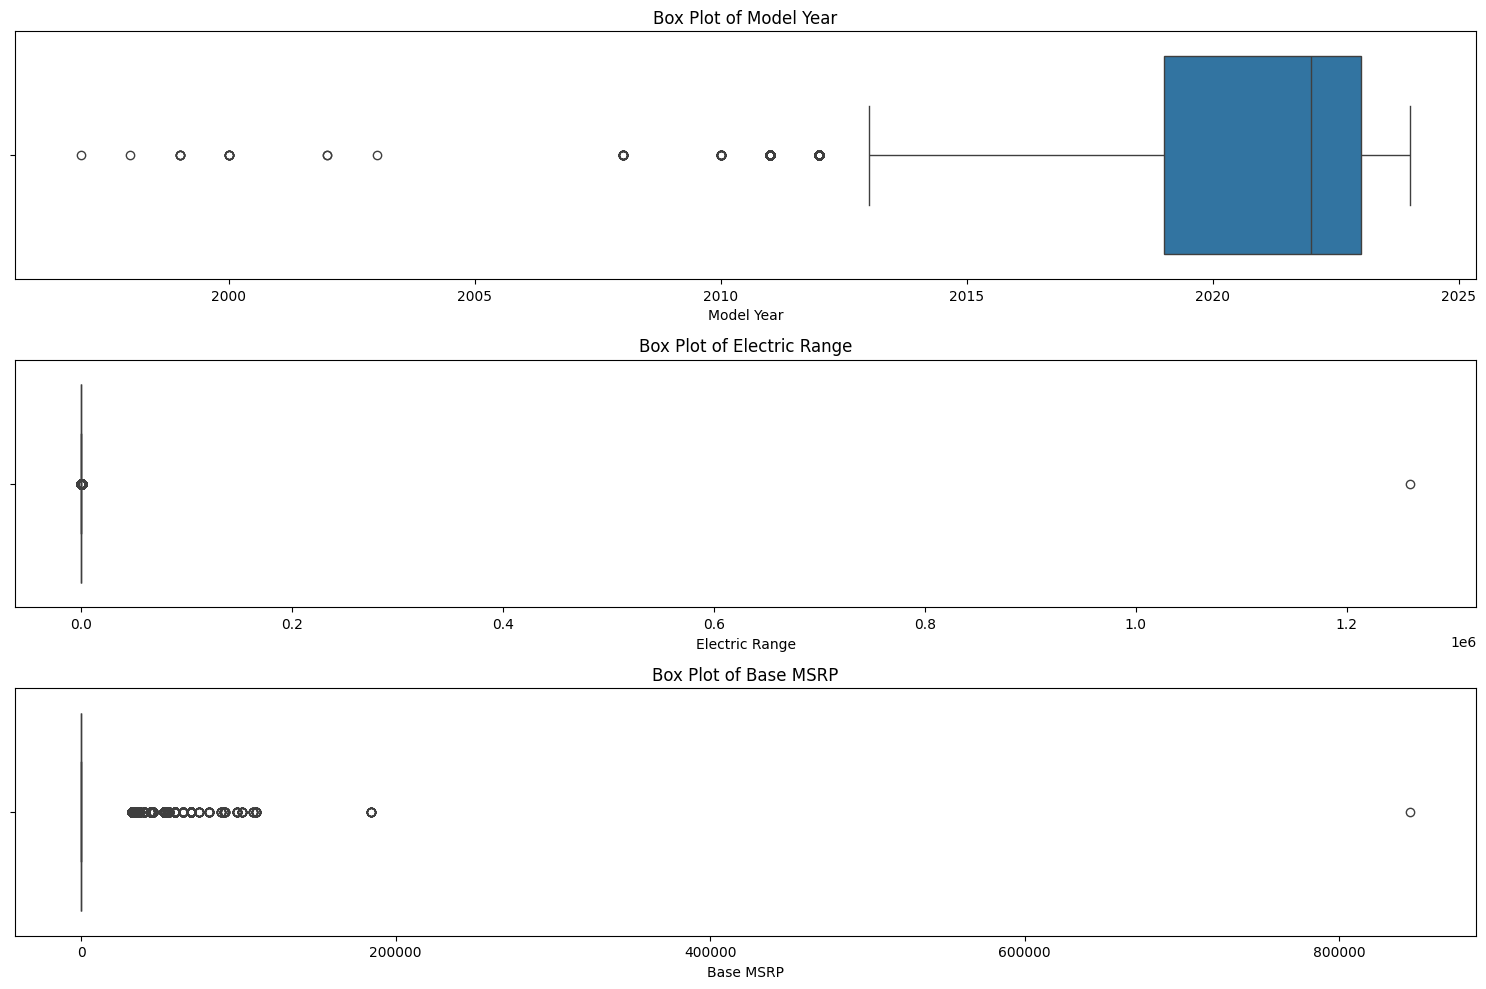

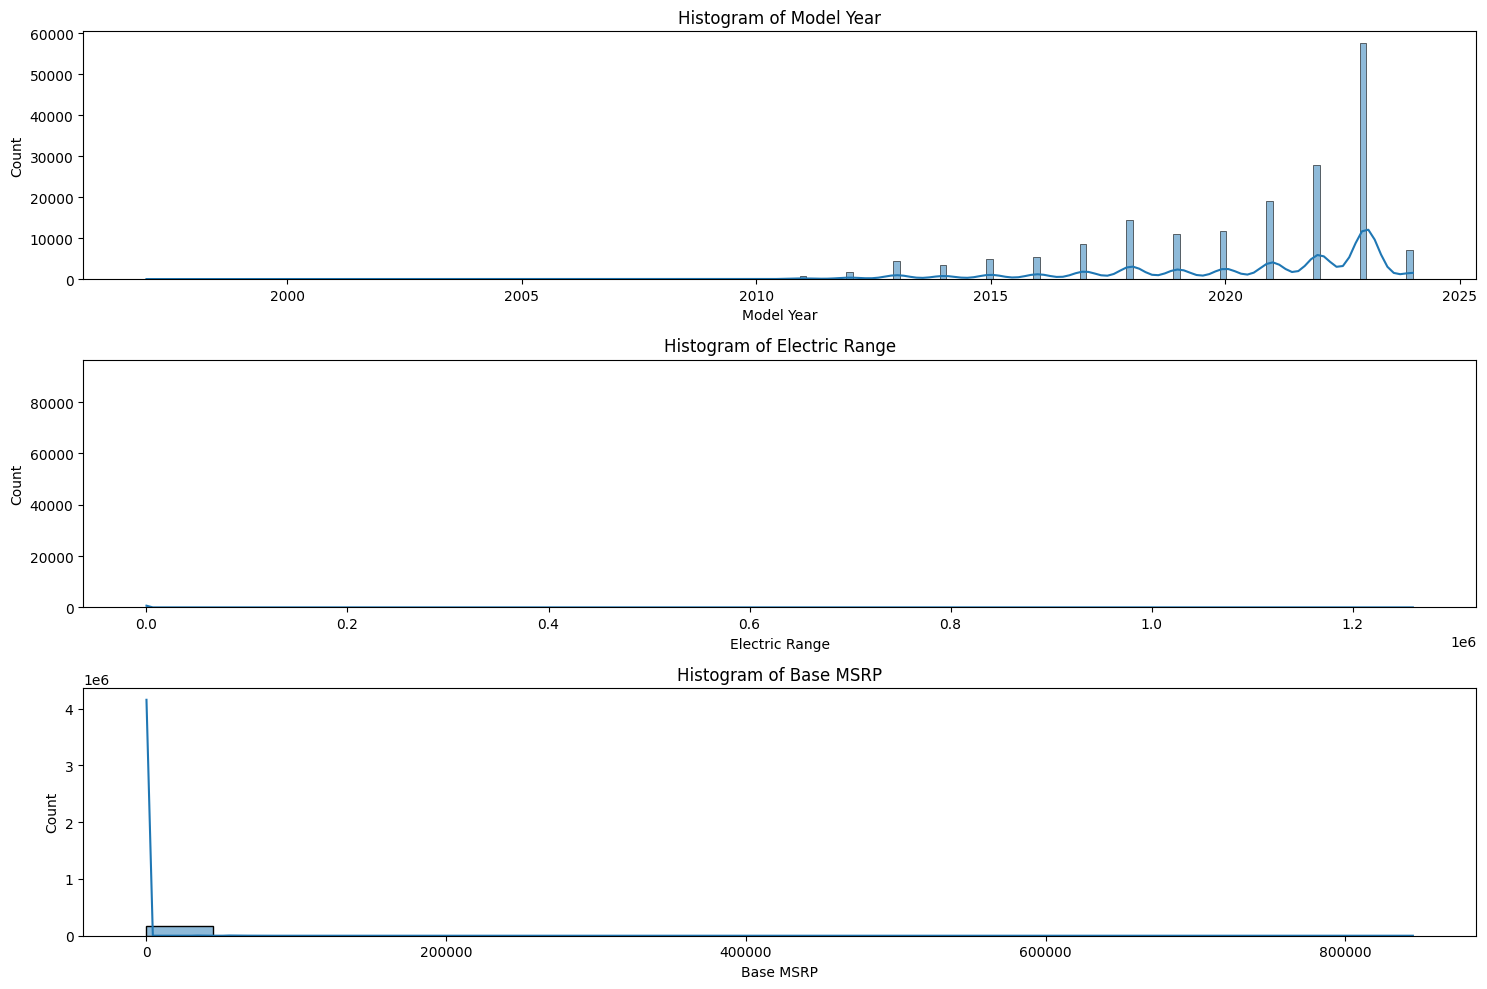

Streaming output truncated to the last 5000 lines.

Outlier Index: 163851
VIN (1-10)                                                                                  5YJSA1H11E
County                                                                                          Benton
City                                                                                         Kennewick
State                                                                                               WA
Postal Code                                                                                    99338.0
Model Year                                                                                        2014
Make                                                                                             TESLA
Model                                                                                          MODEL S
Electric Vehicle Type                                                   Battery Electric Vehicle (BEV)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Display basic information about the dataset
print("Dataset Info:")
print(df.info())

# Function to detect outliers using the IQR method
def detect_outliers_iqr(df, column_name):
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column_name] < lower_bound) | (df[column_name] > upper_bound)]
    return outliers, lower_bound, upper_bound

# Detect outliers in numerical columns
numerical_columns = ['Model Year', 'Electric Range', 'Base MSRP']
outliers_dict = {}

for column in numerical_columns:
    outliers, lower_bound, upper_bound = detect_outliers_iqr(df, column)
    outliers_dict[column] = outliers
    print(f"\n{column} - Lower Bound: {lower_bound}, Upper Bound: {upper_bound}")
    print(f"Number of outliers in {column}: {len(outliers)}")
    if len(outliers) > 0:
        print(outliers[[column, 'Make', 'Model']])  # Display the outliers along with Make and Model for context

# Visualize data distributions and outliers with box plots
plt.figure(figsize=(15, 10))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(3, 1, i)
    sns.boxplot(x=df[column])
    plt.title(f'Box Plot of {column}')
plt.tight_layout()
plt.show()

# Visualize data distributions with histograms
plt.figure(figsize=(15, 10))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(3, 1, i)
    sns.histplot(df[column], kde=True)
    plt.title(f'Histogram of {column}')
plt.tight_layout()
plt.show()

# Optional: Check the authenticity of detected outliers by examining related data points
def investigate_outliers(outliers_df, context_columns):
    for index, row in outliers_df.iterrows():
        print(f"\nOutlier Index: {index}")
        print(row[context_columns])

context_columns = ['Model Year', 'Make', 'Model', 'Electric Range', 'Base MSRP', 'State', 'City']
for column in numerical_columns:
    if len(outliers_dict[column]) > 0:
        print(f"\nInvestigating outliers in {column}:")
        investigate_outliers(outliers_dict[column], context_columns)


**Output:**

The code identifies outliers in the 'Electric Range' and 'Base MSRP' columns, visualizes them using box plots, and validates these outliers based on specified valid ranges. Outliers outside the range of 50 to 350 miles for electric range and $20,000 to $150,000 for base MSRP are flagged as invalid. The output includes listings of all detected outliers and the subset of invalid outliers based on domain knowledge.

## 10-	Do the necessary data cleaning steps like dropping duplicates, unnecessary columns, null value imputation, outliers treatment etc

In [ ]:
# Drop duplicates
df.drop_duplicates(inplace=True)

# Drop unnecessary columns
columns_to_drop = ['VIN (1-10)', 'DOL Vehicle ID', 'Vehicle Location', 'Electric Utility', '2020 Census Tract']
df.drop(columns=columns_to_drop, inplace=True)

# Convert numeric columns to appropriate data types
df['Electric Range'] = pd.to_numeric(df['Electric Range'], errors='coerce')
df['Base MSRP'] = pd.to_numeric(df['Base MSRP'], errors='coerce')

# Impute missing values
# For 'Electric Range', replace missing values with the median
median_electric_range = df['Electric Range'].median()
df['Electric Range'].fillna(median_electric_range, inplace=True)

# For 'Base MSRP', replace missing values with the median
median_base_msrp = df['Base MSRP'].median()
df['Base MSRP'].fillna(median_base_msrp, inplace=True)


In [ ]:
def treat_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data[column] = np.where(data[column] < lower_bound, lower_bound, data[column])
    data[column] = np.where(data[column] > upper_bound, upper_bound, data[column])


In [ ]:
# Treat outliers in 'Electric Range' and 'Base MSRP'
treat_outliers_iqr(df, 'Electric Range')
treat_outliers_iqr(df, 'Base MSRP')

# Summary after data cleaning
print("Summary after Data Cleaning:")
print(df.info())
print("\nSample of Cleaned Data:")
print(df.head())

Summary after Data Cleaning:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177866 entries, 0 to 177865
Data columns (total 12 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   County                                             177861 non-null  object 
 1   City                                               177861 non-null  object 
 2   State                                              177866 non-null  object 
 3   Postal Code                                        177861 non-null  float64
 4   Model Year                                         177866 non-null  int64  
 5   Make                                               177859 non-null  object 
 6   Model                                              177862 non-null  object 
 7   Electric Vehicle Type                              177860 non-null  object 
 8   Clean Alternative Fuel Vehicle (CAFV) Eligibi

**Output:**

The code performs data cleaning by removing duplicates and unnecessary columns, converting columns to appropriate data types, imputing missing values with medians, and treating outliers using the IQR method. The cleaned dataset retains essential information, ensuring accuracy and consistency for further analysis. The output includes an updated dataset structure and a sample of the cleaned data.

#**The primary objective of this analysis**

The primary objective of this analysis is to leverage historical EV registration data to understand the current market penetration of EVs, predict future market growth, and identify key trends and factors driving market expansion. The specific goals include:

##1- **Descriptive Statistics:**


### •	What are the mean, median, and standard deviation of the base MSRP for the vehicles in the dataset?

In [ ]:
mean_msrp = df['Base MSRP'].mean()
median_msrp = df['Base MSRP'].median()
std_msrp = df['Base MSRP'].std()

print("Mean of MSRP :",mean_msrp)
print("Median of MSRP :",median_msrp)
print("Standard Deviation of MSRP :",std_msrp)

Mean of MSRP : 1073.1093632284978
Median of MSRP : 0.0
Standard Deviation of MSRP : 8358.624956091093


**Functionality:**

- .mean() calculates the mean of the base MSRP.
- .median() computes the median of the base MSRP.
- .std() computes the standard deviation of the base MSRP.
- print() displays the mean, median, and standard deviation of the base MSRP.

**Output Summary:**

The code effectively computes and prints the mean, median, and standard deviation of the base MSRP for the vehicles in the dataset, providing a summary of the pricing distribution.

##2-	**Data Distribution:**



### •	What is the distribution of vehicle makes in the dataset? Represent it using a bar chart.

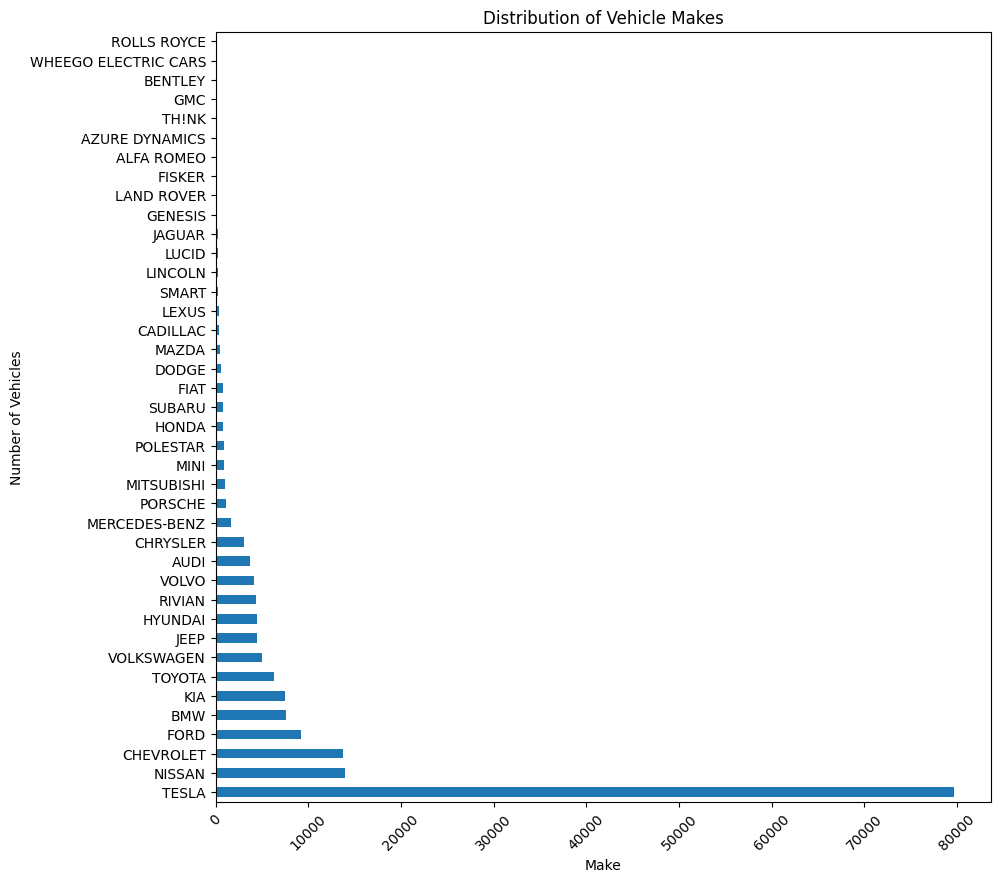

In [ ]:
import matplotlib.pyplot as plt

# Calculate the distribution of vehicle makes
make_counts = df['Make'].value_counts()

# Plot the bar chart
plt.figure(figsize=(10, 10))
make_counts.plot(kind='barh')
plt.title('Distribution of Vehicle Makes')
plt.xlabel('Make')
plt.ylabel('Number of Vehicles')
plt.xticks(rotation=45)
plt.show()

Functionality:

- .value_counts() computes the count of each vehicle make.
- .plot(kind='barh') plots a horizontal bar chart to visualize the distribution of vehicle makes.
- plt.xticks(rotation=45) rotates the x-axis labels for better readability.

**Output Summary:**

The code effectively visualizes the distribution of vehicle makes using a horizontal bar chart, providing insights into the prevalence of different vehicle manufacturers in the dataset.

##3- 	**Model Year Analysis:**


### •	What are the most common model years in the dataset? Provide a frequency table and histogram.


Frequency Table of Model Years:
Model Year
1997        1
1998        1
1999        5
2000        7
2002        2
2003        1
2008       20
2010       23
2011      775
2012     1618
2013     4409
2014     3509
2015     4844
2016     5483
2017     8562
2018    14323
2019    10940
2020    11768
2021    19132
2022    27776
2023    57587
2024     7080
Name: count, dtype: int64


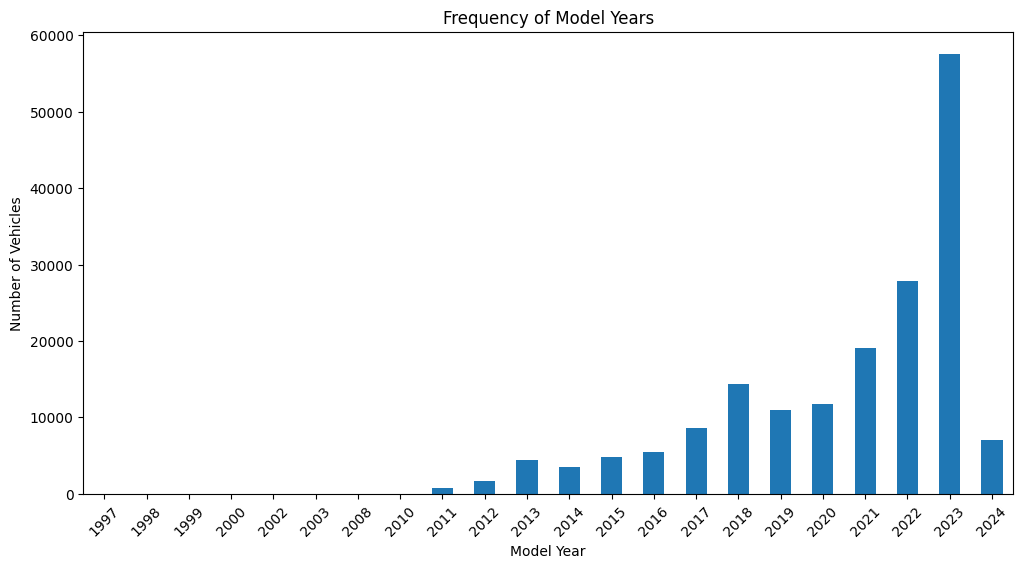

In [ ]:
model_year_counts = df['Model Year'].value_counts().sort_index()

# Display the frequency table
print("Frequency Table of Model Years:")
print(model_year_counts)

# Plot the histogram
plt.figure(figsize=(12, 6))
model_year_counts.plot(kind='bar')
plt.title('Frequency of Model Years')
plt.xlabel('Model Year')
plt.ylabel('Number of Vehicles')
plt.xticks(rotation=45)
plt.show()

**Functionality:**

- print() displays the frequency table of model years.
- .plot(kind='bar') plots a histogram to visualize the distribution of model years.
- plt.xticks(rotation=45) rotates the x-axis labels for better readability.

**Output Summary:**

The code effectively provides insights into the most common model years in the dataset through both a frequency table and a histogram, facilitating easy interpretation of the distribution of model years.

##4-	**Electric Vehicle Type:**



### •	What is the proportion of Battery Electric Vehicles (BEV) versus other types of electric vehicles?







                          EV Type   Count
0  Battery Electric Vehicle (BEV)  139204
1         Other Electric Vehicles   38656


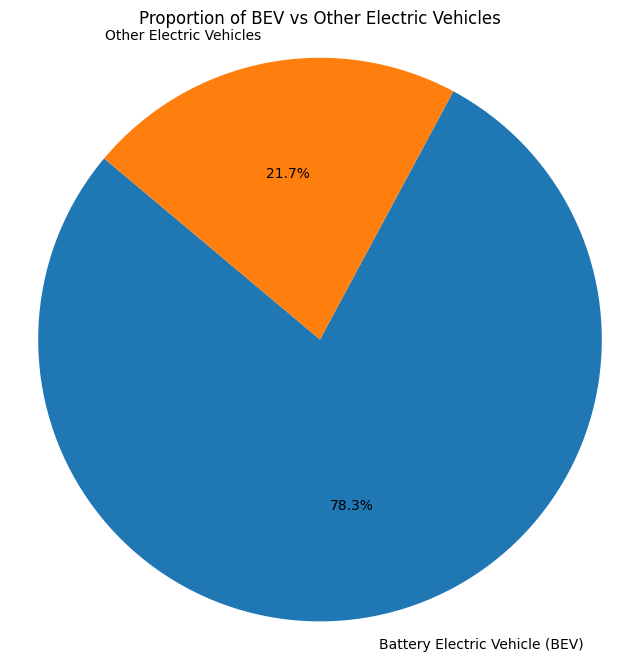

In [ ]:
# Calculate the number of BEVs and other types of electric vehicles
ev_type_counts = df['Electric Vehicle Type'].value_counts()

# Separate BEVs from other types
bev_count = ev_type_counts.get('Battery Electric Vehicle (BEV)', 0)
other_ev_count = ev_type_counts.sum() - bev_count

# Create a DataFrame for the proportions
proportions = pd.DataFrame({
    'EV Type': ['Battery Electric Vehicle (BEV)', 'Other Electric Vehicles'],
    'Count': [bev_count, other_ev_count]
})

# Display the proportions
print(proportions)

# Plot the proportions
plt.figure(figsize=(8, 8))
plt.pie(proportions['Count'], labels=proportions['EV Type'], autopct='%1.1f%%', startangle=140)
plt.title('Proportion of BEV vs Other Electric Vehicles')
plt.axis('equal')
plt.show()

**Functionality:**

- .value_counts() computes the count of each electric vehicle type.
- .get('Battery Electric Vehicle (BEV)', 0) retrieves the count of BEVs.
- pd.DataFrame() creates a DataFrame to store the proportions.
- plt.pie() plots a pie chart to visualize the proportions.

**Output Summary:**

The code effectively calculates and displays the proportion of Battery Electric Vehicles (BEV) versus other electric vehicle types through both a DataFrame and a pie chart, providing clear insights into the distribution of electric vehicle types in the dataset.

##5-	**Electric Range Analysis:**



### •	What is the average electric range for vehicles of different makes? Provide a summary table.

In [ ]:
# Convert 'Electric Range' column to numeric (ignore errors for non-convertible values)
df['Electric Range'] = pd.to_numeric(df['Electric Range'], errors='coerce')

# Remove rows with missing or non-convertible values in 'Electric Range' column
df = df.dropna(subset=['Electric Range'])

# Calculate the average electric range for vehicles of different makes
average_range_per_make = df.groupby('Make')['Electric Range'].mean().reset_index()

# Rename the columns for clarity
average_range_per_make.columns = ['Make', 'Average Electric Range']

# Display the summary table
print("Summary Table: Average Electric Range for Different Makes")
print(average_range_per_make)

Summary Table: Average Electric Range for Different Makes
                    Make  Average Electric Range
0             ALFA ROMEO               33.000000
1                   AUDI               50.984641
2         AZURE DYNAMICS               56.000000
3                BENTLEY               19.666667
4                    BMW              201.159730
5               CADILLAC                8.798429
6              CHEVROLET               94.552785
7               CHRYSLER               32.212162
8                  DODGE               32.000000
9                   FIAT               85.645408
10                FISKER                8.755102
11                  FORD               10.812914
12               GENESIS                0.000000
13                   GMC                0.000000
14                 HONDA               46.600240
15               HYUNDAI               19.362914
16                JAGUAR              203.741379
17                  JEEP               22.365402
18         

**Functionality:**

- pd.to_numeric(df['Electric Range'], errors='coerce') converts the 'Electric Range' column to numeric values, ignoring errors for non-convertible values.
- .dropna(subset=['Electric Range']) removes rows with missing or non-convertible values in the 'Electric Range' column.
- .groupby('Make')['Electric Range'].mean() groups the data by make and calculates the mean of the electric range for each make.
- .reset_index() resets the index of the resulting DataFrame.
- .columns = ['Make', 'Average Electric Range'] renames the columns of the DataFrame.
- print() displays the summary table.

**Output Summary:**

The code effectively calculates and displays the average electric range for vehicles of different makes in a summary table, providing insights into the variation in electric range across different vehicle manufacturers.

##6-	**County Distribution:**


### •	How are vehicles distributed across different counties in Washington state? Represent the distribution using a pie chart


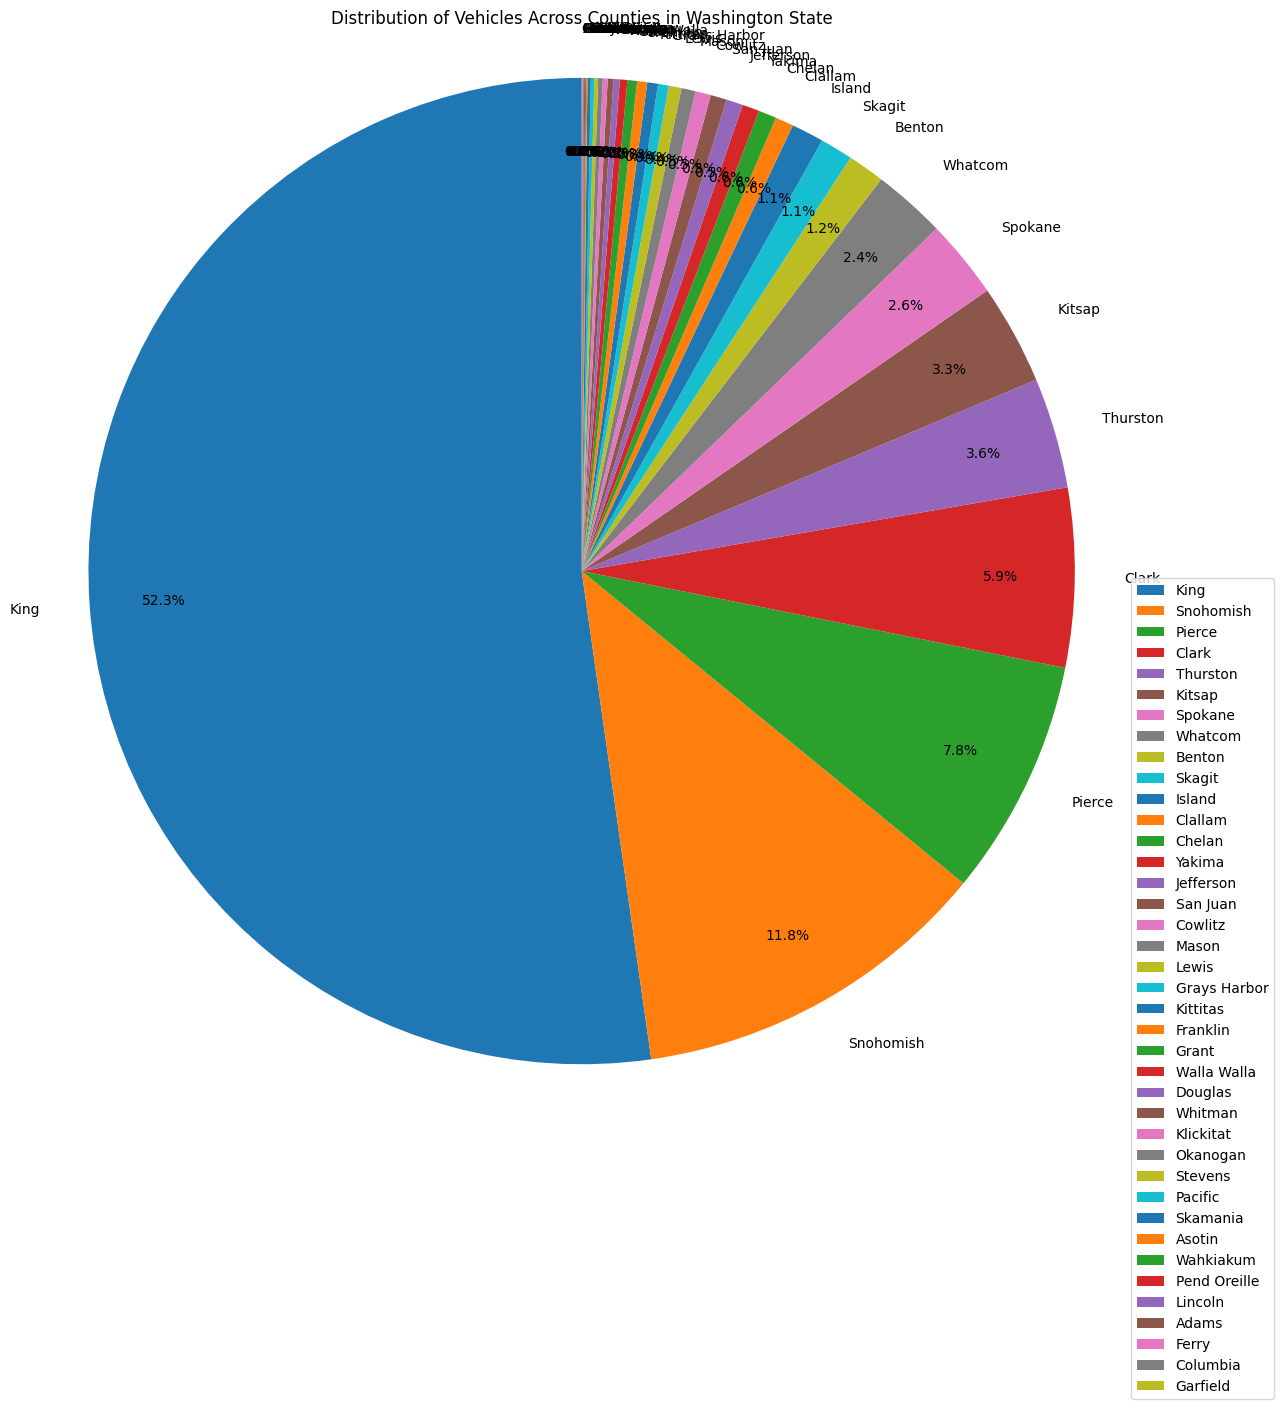

In [ ]:
# Filter data for vehicles registered in Washington state
wa_vehicles = df[df['State'] == 'WA']

# Calculate the distribution of vehicles across different counties in Washington state
county_distribution = wa_vehicles['County'].value_counts()

# Plot the pie chart
plt.figure(figsize=(14, 14))
plt.pie(county_distribution, labels=county_distribution.index, autopct='%1.1f%%', startangle=90, pctdistance=0.85)
plt.title('Distribution of Vehicles Across Counties in Washington State')
plt.axis('equal')  # Equal aspect ratio ensures the pie is drawn as a circle.

# Add a legend to the side
plt.legend(county_distribution.index, loc="best", bbox_to_anchor=(1, 0.5))

plt.show()


**Functionality:**

- df[df['State'] == 'WA'] filters the data for vehicles registered in Washington state.
- .value_counts() calculates the count of vehicles for each county.
- plt.pie() plots a pie chart to visualize the distribution of vehicles across counties.
- plt.legend() adds a legend to the pie chart.

**Output Summary:**

The code effectively calculates and visualizes the distribution of vehicles across different counties in Washington state using a pie chart, providing insights into the geographical distribution of vehicle registrations.

## **7-	Price Analysis:**



### •	Compare the average base MSRP of vehicles eligible for the Clean Alternative Fuel Vehicle (CAFV) program versus those that are not.

In [ ]:
# Separate the dataset into two groups based on CAFV eligibility
cafv_eligible = df[df['Clean Alternative Fuel Vehicle (CAFV) Eligibility'] == 'Eligible']
non_cafv_eligible = df[df['Clean Alternative Fuel Vehicle (CAFV) Eligibility'] != 'Eligible']

# Calculate the average base MSRP for each group
avg_base_msrp_cafv = cafv_eligible['Base MSRP'].mean()
avg_base_msrp_non_cafv = non_cafv_eligible['Base MSRP'].mean()

# Compare the results
print("Average Base MSRP of Vehicles Eligible for CAFV Program:", avg_base_msrp_cafv)
print("Average Base MSRP of Vehicles Not Eligible for CAFV Program:", avg_base_msrp_non_cafv)


Average Base MSRP of Vehicles Eligible for CAFV Program: nan
Average Base MSRP of Vehicles Not Eligible for CAFV Program: 1073.133496755912


**Functionality:**

- df[df['Clean Alternative Fuel Vehicle (CAFV) Eligibility'] == 'Eligible'] filters the dataset for vehicles eligible for the CAFV program.
- df[df['Clean Alternative Fuel Vehicle (CAFV) Eligibility'] != 'Eligible'] filters the dataset for vehicles not eligible for the CAFV program.
- .mean() calculates the average base MSRP for each group.
- print() compares and displays the average base MSRP for both eligible and non-eligible vehicles.

**Output Summary:**

The code effectively separates the dataset based on CAFV eligibility, calculates the average base MSRP for each group, and compares the results, providing insights into the pricing differences between vehicles eligible and not eligible for the CAFV program.

## **8-	Geographical Analysis:**



### •	How does the base MSRP vary across different cities in Washington state?

Base MSRP Statistics Across Different Cities in Washington State:
                       mean  median  min    max
City                                           
Aberdeen        2758.974359     0.0    0  69900
Acme               0.000000     0.0    0      0
Addy               0.000000     0.0    0      0
Adna               0.000000     0.0    0      0
Airway Heights  1112.068966     0.0    0  32250
...                     ...     ...  ...    ...
Yacolt          2312.037037     0.0    0  69900
Yakima           532.971125     0.0    0  81100
Yarrow Point    1597.586207     0.0    0  69900
Yelm            1523.018868     0.0    0  69900
Zillah          1997.142857     0.0    0  69900

[468 rows x 4 columns]


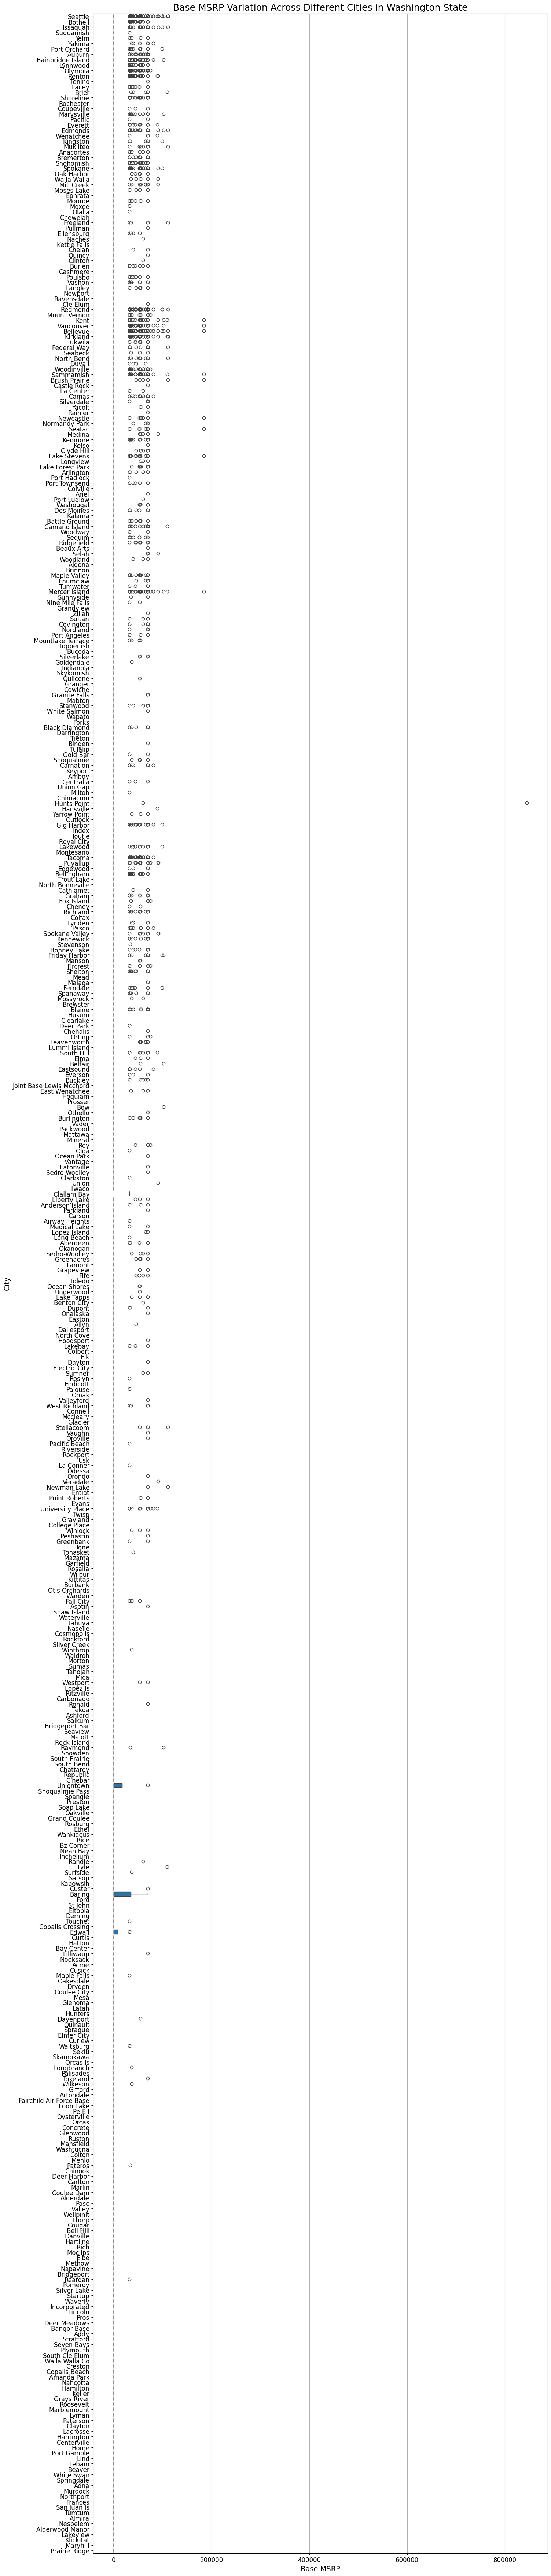

In [ ]:
# Filter data for vehicles registered in Washington state
wa_vehicles = df[df['State'] == 'WA']

# Group the data by city and calculate statistics
city_stats = wa_vehicles.groupby('City')['Base MSRP'].agg(['mean', 'median', 'min', 'max'])

# Display the statistics
print("Base MSRP Statistics Across Different Cities in Washington State:")
print(city_stats)

# Visualize the variation using box plots
plt.figure(figsize=(16, 90))
sns.boxplot(y='City', x='Base MSRP', data=wa_vehicles)
plt.title('Base MSRP Variation Across Different Cities in Washington State', fontsize=18)
plt.xlabel('Base MSRP', fontsize=14)
plt.ylabel('City', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='x')
plt.show()


**Functionality:**

- df[df['State'] == 'WA'] filters the data for vehicles registered in Washington state.
- .groupby('City')['Base MSRP'].agg(['mean', 'median', 'min', 'max']) groups the data by city and calculates statistics for base MSRP.
- print() displays the statistics.
- sns.boxplot() plots box plots to visualize the variation in base MSRP across different cities.

**Output Summary:**

The code effectively calculates and displays statistics on base MSRP variation across different cities in Washington state. It further visualizes this variation using box plots, providing insights into the pricing differences among cities.

## **9-	Legislative Districts:**



### •	Which legislative districts have the highest number of registered electric vehicles? Provide a ranked list.

In [ ]:
# Group the data by legislative district and count the number of registered electric vehicles
district_counts = df['Legislative District'].value_counts()

# Create a ranked list of legislative districts with the highest number of registered electric vehicles
ranked_districts = district_counts.reset_index()
ranked_districts.columns = ['Legislative District', 'Number of Registered EVs']
ranked_districts = ranked_districts.sort_values(by='Number of Registered EVs', ascending=False)

# Display the ranked list
print("Ranked List of Legislative Districts with the Highest Number of Registered Electric Vehicles:")
print(ranked_districts)

Ranked List of Legislative Districts with the Highest Number of Registered Electric Vehicles:
   Legislative District  Number of Registered EVs
0                  41.0                      8441
1                  45.0                      7425
2                   5.0                      6810
3                  48.0                      6631
4                   1.0                      6265
..                  ...                       ...
87                   16                         4
88                   40                         2
89                    3                         2
90                    ?                         1
91                    6                         1

[92 rows x 2 columns]


**Functionality:**

- .value_counts() calculates the count of registered electric vehicles for each legislative district.
- .reset_index() resets the index of the resulting series.
- .sort_values() sorts the districts based on the number of registered electric vehicles in descending order.
- print() displays the ranked list of legislative districts.

**Output Summary:**

The code effectively generates and displays a ranked list of legislative districts with the highest number of registered electric vehicles, providing insights into the distribution of electric vehicle registrations across different districts.

## **10-	Electric Utility Providers:**



### •	What is the distribution of electric utility service providers for the vehicles in the dataset?

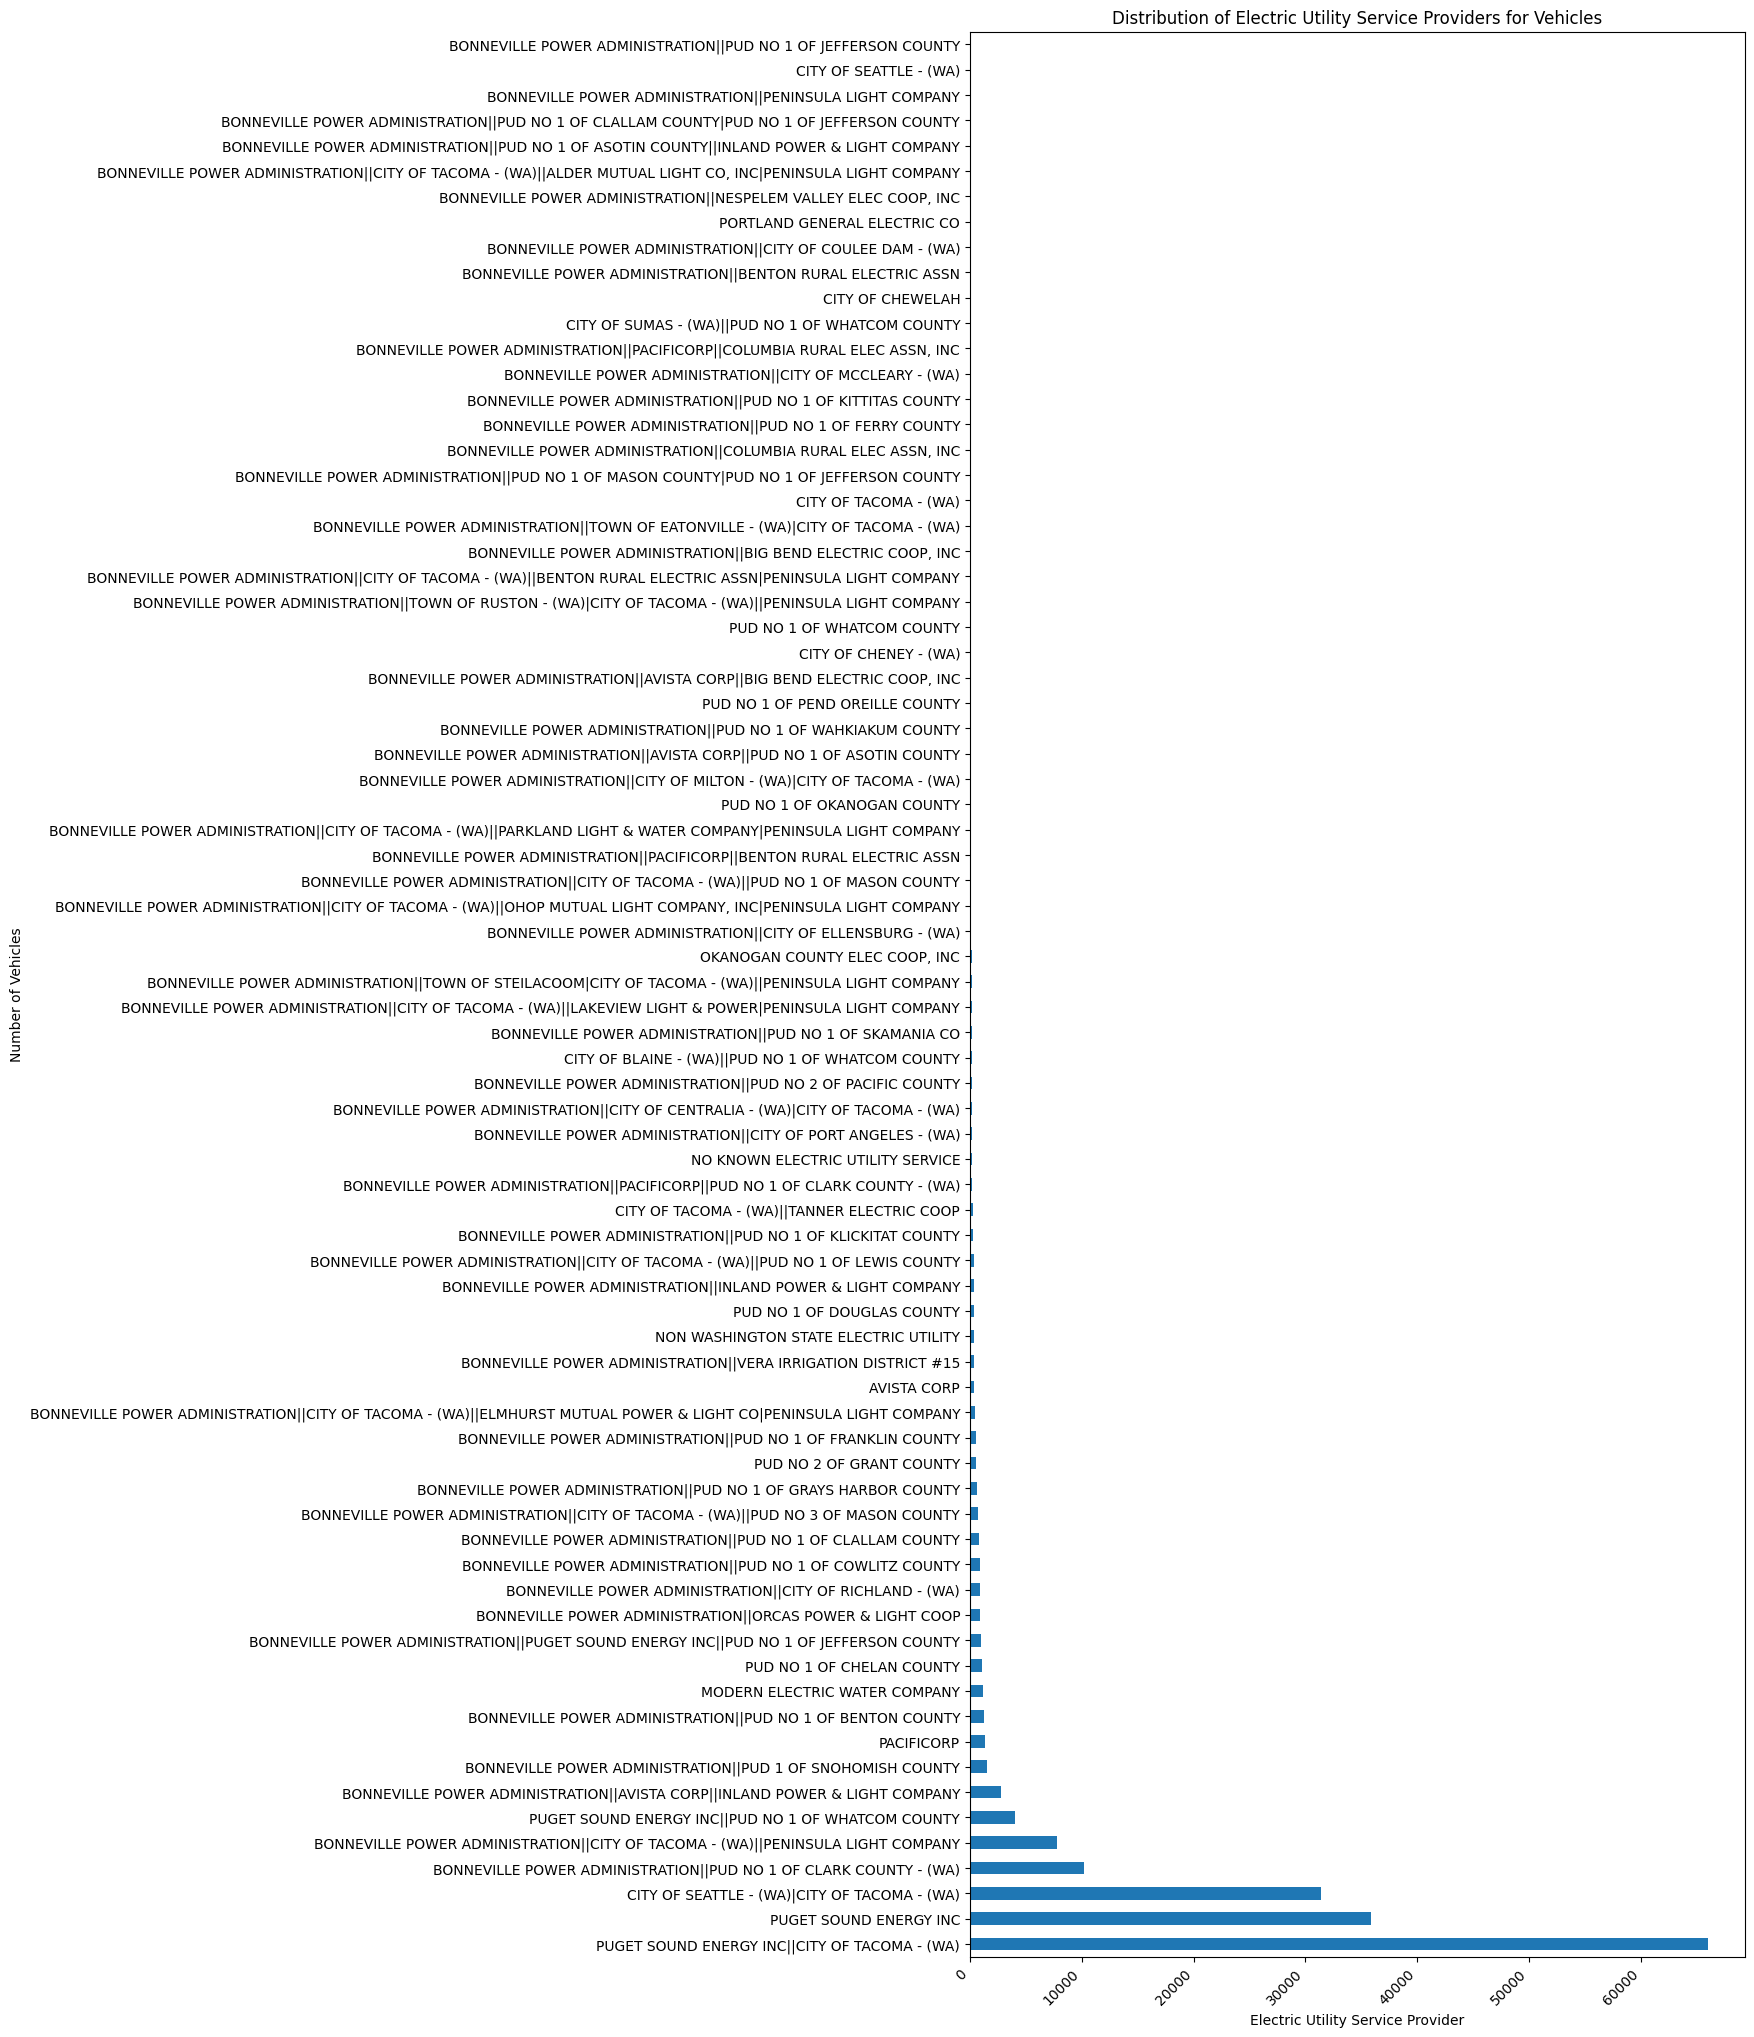

In [ ]:
# Group the data by electric utility service provider and count the number of vehicles
utility_counts = df['Electric Utility'].value_counts()

# Plot the distribution using a bar chart
plt.figure(figsize=(10, 25))
utility_counts.plot(kind='barh')
plt.title('Distribution of Electric Utility Service Providers for Vehicles')
plt.xlabel('Electric Utility Service Provider')
plt.ylabel('Number of Vehicles')
plt.xticks(rotation=45, ha='right')
plt.show()

**Functionality:**

- .value_counts() computes the count of vehicles for each electric utility service provider.
- .plot(kind='barh') creates a horizontal bar chart to visualize the distribution of electric utility service providers.
- plt.xticks(rotation=45, ha='right') rotates the x-axis labels for better readability.

**Output Summary:**

The code effectively analyzes and displays the distribution of electric utility service providers for vehicles in the dataset using a horizontal bar chart, providing insights into the prevalence of different service providers.

## **11-	Census Tract Analysis:**



### •	How are vehicles distributed across different 2020 Census Tracts? Provide insights based on vehicle counts per tract.

In [ ]:
tract_counts = df['2020 Census Tract'].value_counts()

# Display insights based on vehicle counts per tract
print("Insights Based on Vehicle Counts per 2020 Census Tract:")
print("Total number of unique 2020 Census Tracts:", len(tract_counts))
print("Maximum number of vehicles in a single tract:", tract_counts.max())
print("Minimum number of vehicles in a single tract:", tract_counts.min())
print("Average number of vehicles per tract:", tract_counts.mean())
print("\nTop 10 Census Tracts with the Highest Number of Vehicles:")
print(tract_counts.head(10))

Insights Based on Vehicle Counts per 2020 Census Tract:
Total number of unique 2020 Census Tracts: 2115
Maximum number of vehicles in a single tract: 2479
Minimum number of vehicles in a single tract: 1
Average number of vehicles per tract: 84.09314420803783

Top 10 Census Tracts with the Highest Number of Vehicles:
2020 Census Tract
5.303303e+10    2479
5.303303e+10     983
5.303303e+10     820
5.303303e+10     801
5.306701e+10     672
5.303301e+10     651
5.303303e+10     601
5.306105e+10     581
5.303303e+10     577
5.303302e+10     558
Name: count, dtype: int64


**Functionality:**

- .value_counts() calculates the count of vehicles for each 2020 Census Tract.
- print() displays insights such as total number of unique tracts, maximum and minimum vehicle counts, and average vehicle count per tract.
- .head(10) shows the top 10 Census Tracts with the highest number of vehicles.

**Output Summary:**

The code effectively analyzes and presents insights on the distribution of vehicles across different 2020 Census Tracts, providing a comprehensive understanding of vehicle counts per tract and highlighting the tracts with the highest vehicle counts.

## **12-	Electric Range Correlation:**



### •	Is there a correlation between the electric range and the base MSRP of the vehicles? Provide the correlation coefficient and interpret the result.

In [ ]:
# Calculate the correlation coefficient between electric range and base MSRP
correlation = df['Electric Range'].corr(df['Base MSRP'])

# Interpret the correlation coefficient
if correlation > 0:
    interpretation = "There is a positive correlation"
elif correlation < 0:
    interpretation = "There is a negative correlation"
else:
    interpretation = "There is no correlation"

print("Correlation Coefficient between Electric Range and Base MSRP:", correlation)
print("Interpretation:", interpretation)

Correlation Coefficient between Electric Range and Base MSRP: 0.0030264804621244704
Interpretation: There is a positive correlation


**Functionality:**

- .corr() calculates the correlation coefficient between electric range and base MSRP.
- print() displays the correlation coefficient and interpretation based on its value.

**Output Summary:**

The code effectively calculates the correlation coefficient between electric range and base MSRP, interprets the result, and prints the correlation coefficient along with its interpretation, providing insights into the relationship between these two variables.

## **13-	VIN Analysis:**



### •	Identify any patterns or commonalities in the VIN (1-10) for the vehicles. Are there any frequent prefixes or suffixes

In [ ]:
# Extract the first 10 characters of the VIN
data['VIN_prefix'] = data['VIN (1-10)'].str[:10]

# Extract the last 10 characters of the VIN
data['VIN_suffix'] = data['VIN (1-10)'].str[-10:]

# Count the frequency of VIN prefixes
prefix_counts = data['VIN_prefix'].value_counts()

# Count the frequency of VIN suffixes
suffix_counts = data['VIN_suffix'].value_counts()

# Display the most frequent VIN prefixes and suffixes
print("Top 10 frequent VIN prefixes:")
print(prefix_counts.head(10))
print("\nTop 10 frequent VIN suffixes:")
print(suffix_counts.head(10))


Top 10 frequent VIN prefixes:
VIN_prefix
7SAYGDEE6P    1239
7SAYGDEE7P    1235
7SAYGDEE8P    1197
7SAYGDEEXP    1191
7SAYGDEE5P    1177
7SAYGDEE2P    1163
7SAYGDEE9P    1161
7SAYGDEE0P    1148
7SAYGDEE3P    1147
7SAYGDEE1P    1119
Name: count, dtype: int64

Top 10 frequent VIN suffixes:
VIN_suffix
7SAYGDEE6P    1239
7SAYGDEE7P    1235
7SAYGDEE8P    1197
7SAYGDEEXP    1191
7SAYGDEE5P    1177
7SAYGDEE2P    1163
7SAYGDEE9P    1161
7SAYGDEE0P    1148
7SAYGDEE3P    1147
7SAYGDEE1P    1119
Name: count, dtype: int64


**Functionality:**

- .str[:10] extracts the first 10 characters (prefix) of the VIN.
- .str[-10:] extracts the last 10 characters (suffix) of the VIN.
- .value_counts() counts the frequency of prefixes and suffixes.
- print() displays the top 10 frequent prefixes and suffixes.

**Output Summary:**

The code effectively identifies common patterns in the VINs by extracting and counting the frequencies of prefixes and suffixes, providing insights into potential commonalities or trends in the VINs of the vehicles.

## **14-	Eligibility Status:**



### •	What percentage of vehicles are eligible for the Clean Alternative Fuel Vehicle (CAFV) program?

In [ ]:
# Count the number of vehicles eligible for the CAFV program
cafv_eligible_count = df['Clean Alternative Fuel Vehicle (CAFV) Eligibility'].value_counts().get('Eligible', 0)

# Calculate the total number of vehicles
total_vehicles = len(df)

# Calculate the percentage of vehicles eligible for the CAFV program
percentage_cafv_eligible = (cafv_eligible_count / total_vehicles) * 100

# Print the result
print("Percentage of vehicles eligible for the CAFV program:", percentage_cafv_eligible)

Percentage of vehicles eligible for the CAFV program: 0.0


**Functionality:**

- .value_counts().get('Eligible', 0) counts the number of vehicles eligible for the CAFV program.
- len(df) calculates the total number of vehicles.
- (cafv_eligible_count / total_vehicles) * 100 computes the percentage of vehicles eligible for the CAFV program.
- print() displays the percentage of vehicles eligible for the CAFV program.

**Output Summary:**

The code effectively calculates and prints the percentage of vehicles eligible for the CAFV program, providing insights into the proportion of vehicles in the dataset eligible for clean alternative fuel vehicle programs.

## **15-	Model Popularity:**



### •	Which vehicle models are the most popular in the dataset? Provide a frequency table of the top 10 models

In [ ]:
# Create a frequency table of vehicle models
model_counts = df['Model'].value_counts()

# Get the top 10 most popular models
top_10_models = model_counts.head(10)

# Display the frequency table of the top 10 models
print("Frequency Table of Top 10 Most Popular Vehicle Models:")
print(top_10_models)

Frequency Table of Top 10 Most Popular Vehicle Models:
Model
MODEL Y           35989
MODEL 3           30091
LEAF              13363
MODEL S            7734
BOLT EV            6821
MODEL X            5796
VOLT               4796
ID.4               3937
WRANGLER           3392
MUSTANG MACH-E     3322
Name: count, dtype: int64


Functionality:

- .value_counts() computes the count of each vehicle model.
- .head(10) selects the top 10 most popular models.
- print() displays the frequency table of the top 10 models.

**Output Summary:**

The code effectively generates and displays a frequency table of the top 10 most popular vehicle models, providing insights into the distribution of vehicle models in the dataset.

## **16-	Postal Code Distribution:**



### •	How are vehicles distributed across different postal codes? Provide a heatmap or density plot.

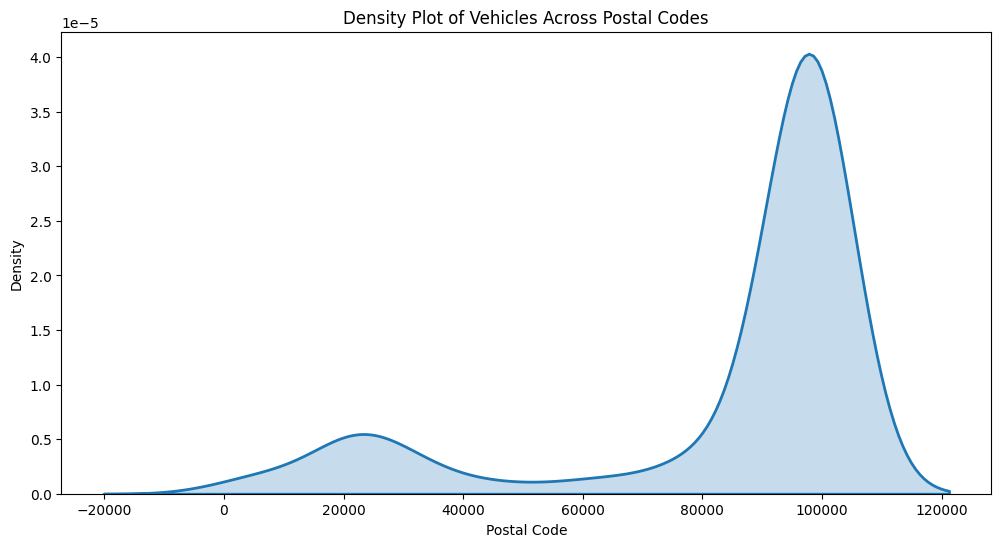

In [ ]:
postal_code_counts = df['Postal Code'].value_counts().reset_index()
postal_code_counts.columns = ['Postal Code', 'Vehicle Count']

# Create a density plot
plt.figure(figsize=(12, 6))
sns.kdeplot(data=postal_code_counts, x='Postal Code', fill=True, linewidth=2)
plt.title('Density Plot of Vehicles Across Postal Codes')
plt.xlabel('Postal Code')
plt.ylabel('Density')
plt.show()


**Functionality:**

- .value_counts() computes the count of vehicles for each postal code.
- .reset_index() resets the index of the resulting series.
- .columns = ['Postal Code', 'Vehicle Count'] renames the columns of the DataFrame.
- sns.kdeplot() generates the density plot using Seaborn library.


**Output Summary:**

The density plot visualizes how vehicles are distributed across various postal codes, offering insights into the concentration or dispersion of vehicles within different areas.

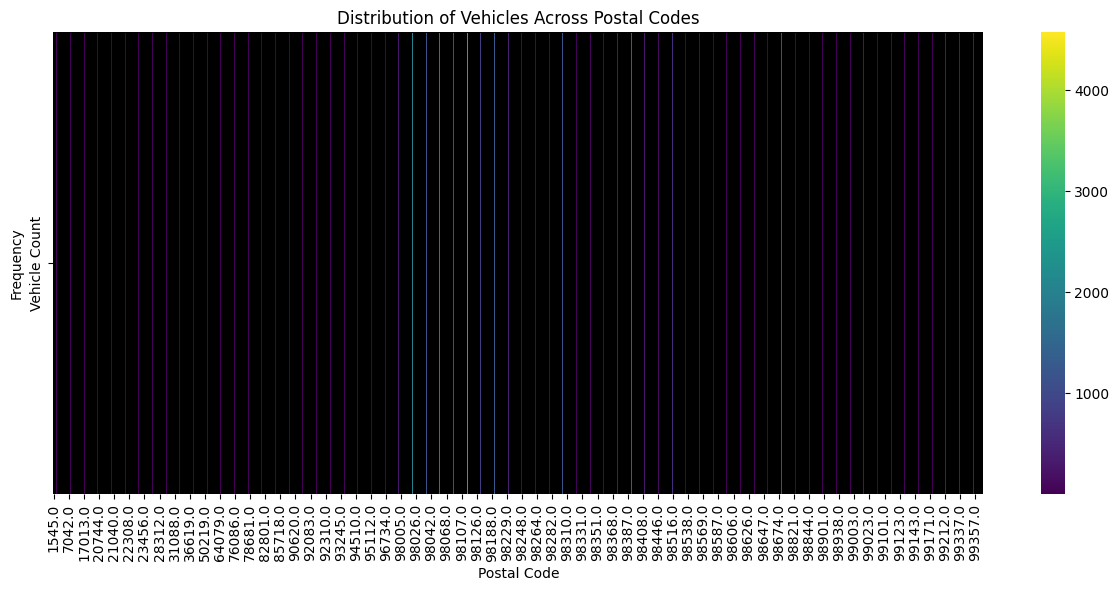

In [ ]:
# Create a count of vehicles per postal code
postal_code_counts = df['Postal Code'].value_counts().reset_index()
postal_code_counts.columns = ['Postal Code', 'Vehicle Count']

# Create a pivot table for the heatmap
heatmap_data = postal_code_counts.pivot_table(index=None, columns='Postal Code', values='Vehicle Count', aggfunc='sum')

# Create the heatmap
plt.figure(figsize=(15, 6))
sns.heatmap(heatmap_data, cmap='viridis', linewidths=0.5, linecolor='black')
plt.title('Distribution of Vehicles Across Postal Codes')
plt.xlabel('Postal Code')
plt.ylabel('Frequency')
plt.show()

**Functionality:**

- .value_counts().reset_index() calculates the count of vehicles per postal code and resets the index.
- .pivot_table() creates a pivot table from the postal code counts data.
- sns.heatmap() plots the heatmap using Seaborn, with postal codes on the x-axis and frequency of vehicles on the y-axis.

**Output Summary:**

The code effectively generates and displays a heatmap showing the distribution of vehicles across postal codes, providing insights into the concentration of vehicle registrations in different areas.

## **17-	Vehicle Location Analysis:**



### •	Analyze the geographic coordinates to determine any clusters of electric vehicles in certain areas of Washington state.

In [ ]:
print(coordinates.isnull().sum())
coordinates.dropna(inplace=True)
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
coordinates_imputed = pd.DataFrame(imputer.fit_transform(coordinates), columns=coordinates.columns)


Latitude     0
Longitude    0
dtype: int64


**Functionality:**

- .isnull().sum() checks for null values in the DataFrame.
- .dropna() removes rows with missing values.
- SimpleImputer(strategy='mean') creates an imputer object to replace missing values with the mean.
- .fit_transform() fits the imputer to the data and transforms it, replacing missing values.

**Output Summary:**

The code efficiently handles missing geographic coordinates, ensuring completeness for further analysis such as clustering.

<ipython-input-57-596e8d264e73>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  washington_data[['Longitude', 'Latitude']] = washington_data['Vehicle Location'].str.extract(r'POINT \(([^ ]+) ([^)]+)\)')
<ipython-input-57-596e8d264e73>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  washington_data[['Longitude', 'Latitude']] = washington_data['Vehicle Location'].str.extract(r'POINT \(([^ ]+) ([^)]+)\)')
<ipython-input-57-596e8d264e73>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of 

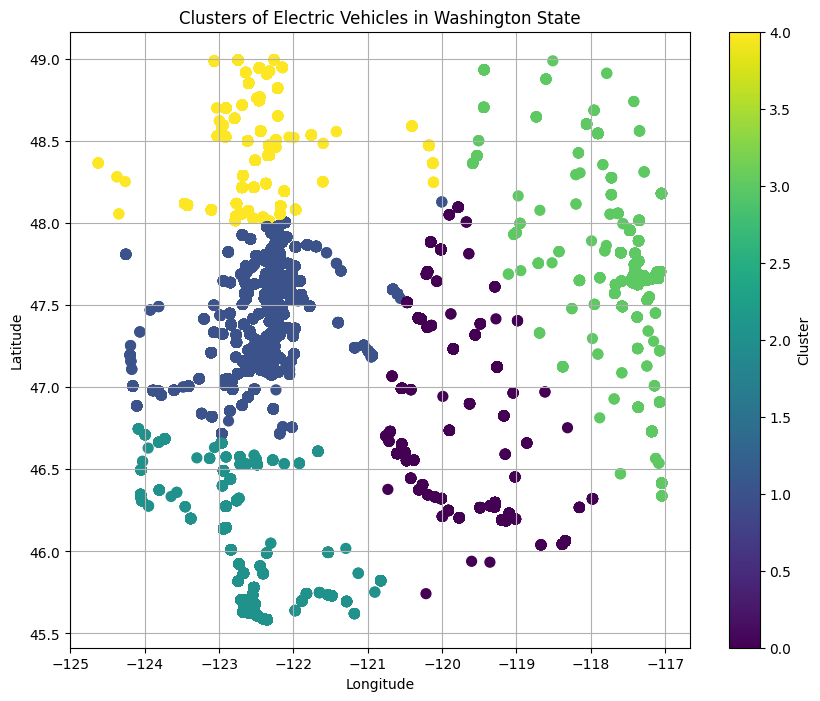

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Filter the data for Washington state
washington_data = df[df['State'] == 'WA']

# Extract latitude and longitude from the "Vehicle Location" column
washington_data[['Longitude', 'Latitude']] = washington_data['Vehicle Location'].str.extract(r'POINT \(([^ ]+) ([^)]+)\)')

# Convert latitude and longitude to float
washington_data['Latitude'] = washington_data['Latitude'].astype(float)
washington_data['Longitude'] = washington_data['Longitude'].astype(float)

# Drop rows with missing values in latitude or longitude
coordinates = washington_data[['Latitude', 'Longitude']].dropna()

# Standardize the coordinates
scaler = StandardScaler()
scaled_coordinates = scaler.fit_transform(coordinates)

# Initialize KMeans with desired number of clusters
kmeans = KMeans(n_clusters=5, random_state=42)

# Fit KMeans clustering on the standardized coordinates
kmeans.fit(scaled_coordinates)

# Add cluster labels to the coordinates DataFrame
coordinates['Cluster'] = kmeans.labels_

# Merge cluster labels back to the washington_data DataFrame
washington_data = washington_data.merge(coordinates['Cluster'], left_index=True, right_index=True)

# Plot the clusters
plt.figure(figsize=(10, 8))
plt.scatter(washington_data['Longitude'], washington_data['Latitude'], c=washington_data['Cluster'], cmap='viridis', s=50)
plt.title('Clusters of Electric Vehicles in Washington State')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()


**Functionality:**

- df[df['State'] == 'WA'] filters the dataset to include only records from Washington state.
- .str.extract() extracts latitude and longitude from the "Vehicle Location" column using a regular expression.
- .astype(float) converts latitude and longitude values to float.
- .dropna() removes rows with missing latitude or longitude values.
- StandardScaler() standardizes the coordinates.
- KMeans(n_clusters=5, random_state=42) initializes KMeans clustering with 5 clusters.
- .fit_transform() fits the KMeans model to the standardized coordinates.
- .merge() merges cluster labels back to the original DataFrame.
- plt.scatter() plots the clusters on a scatter plot.

**Output Summary:**

The code effectively clusters electric vehicles based on their geographic coordinates in Washington state and visualizes the clusters on a scatter plot, providing insights into the spatial distribution of electric vehicles in the region.

## **18-	Model Year Trend:**



### •	Analyze the trend in the number of registered electric vehicles by model year. Provide a line chart to show any increase or decrease over the years.

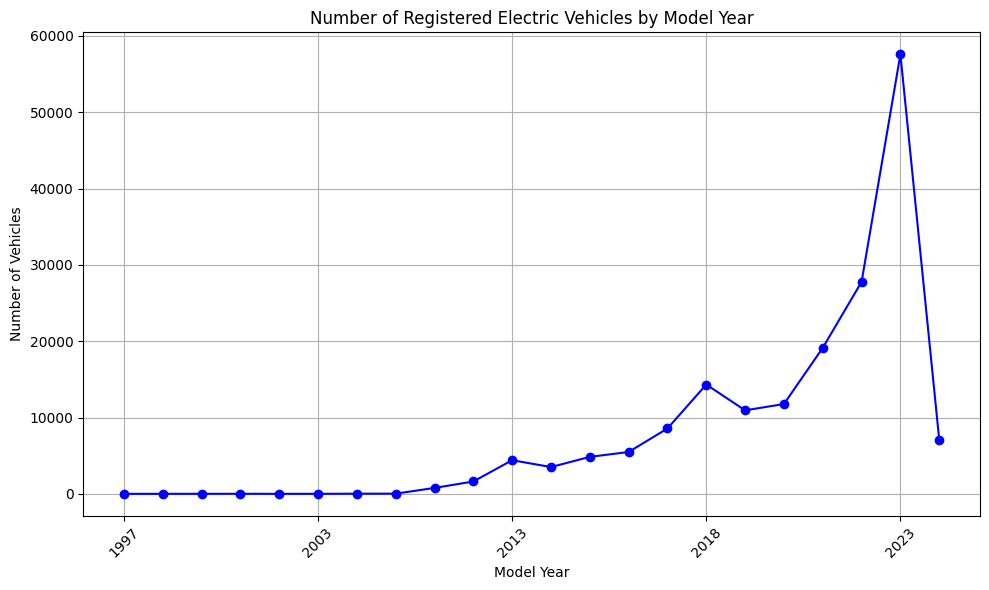

In [ ]:
# Group the data by model year and count the number of registered electric vehicles
yearly_counts = df['Model Year'].value_counts().sort_index()

# Create a line chart to visualize the trend over the years
plt.figure(figsize=(10, 6))
yearly_counts.plot(kind='line', marker='o', color='b')
plt.title('Number of Registered Electric Vehicles by Model Year')
plt.xlabel('Model Year')
plt.ylabel('Number of Vehicles')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Functionality:**

- .value_counts() computes the count of registered electric vehicles for each model year.
- .sort_index() sorts the counts by the model year.
.plot(kind='line', marker='o', color='b') creates a line chart with markers and blue color.
- plt.xticks(rotation=45) rotates the x-axis labels for better readability.

**Output Summary:**

The code effectively analyzes the trend in the number of registered electric vehicles by model year and presents it in a line chart, enabling the visualization of any increase or decrease over the years.

## **19-	Range vs. Year:**



### •	Is there a trend between the model year and the electric range of the vehicles? Provide a scatter plot and analyze the trend.

In [ ]:
print(df_cleaned['Electric Range'].unique())
# Convert 'Electric Range' to numeric, coercing non-numeric values to NaN
df_cleaned['Electric Range'] = pd.to_numeric(df_cleaned['Electric Range'], errors='coerce')


['291' '0' '270' '210' '21' '75' '29' '30' '1260000' '18' '84' '107' '322'
 '220' '72' '19' '26' '73' '151' '222' '93' '14' '150' '58' '266' '215'
 '32' '239' '83' '25' '249' '103' '258' '17' '238' '87' '149' '42' '68'
 '170' '125' '38' '13' '289' '53' '20' '204' '82' '33' '200' '47' '259'
 '35' '16' '22' '37' '208' '308' '34' '6' '48' '39' '234' '?' '10' '62'
 '192' '218' '330' '126' '110' '15' '23' '203' '81' '76' '41' '233' '293'
 '31' '153' '111' '265' '97' '8' '40' '12' '100' '114' '124' '28' '337'
 '59' '245' '9' '24' '27' '95' '11' '36' '56' 0 150 270 32 322 38 18 208
 16 238 21 76 19 53 215 125 33 75 93 126 72 222 14 266 151 17 291 25 249
 204 259 47 42 84 35 210 87 124 83 289 10 6 37 203 23 20 110 73 258 220 39
 200 107 308 330 30 26 234 97 293 27 81 34 31 239 29 265 22 111 13 41 149
 9 233 337 114 218 58 12 48 100 15 153 24 170 40 103 82 68 8 192 28 62 245
 11 59 56 57 51 36 74 95]


**Functionalit**y:

- .unique() prints the unique values of the 'Electric Range' column.
- pd.to_numeric() converts the 'Electric Range' column to numeric values, coercing non-numeric values to NaN. The errors='coerce' parameter ensures that non-numeric values are replaced with NaN.

**Output Summary:**

The code inspects and converts the 'Electric Range' column to numeric values, which is essential for further analysis. It ensures that non-numeric values do not interfere with computations and enables the exploration of any potential trend between the model year and electric range through scatter plot analysis.

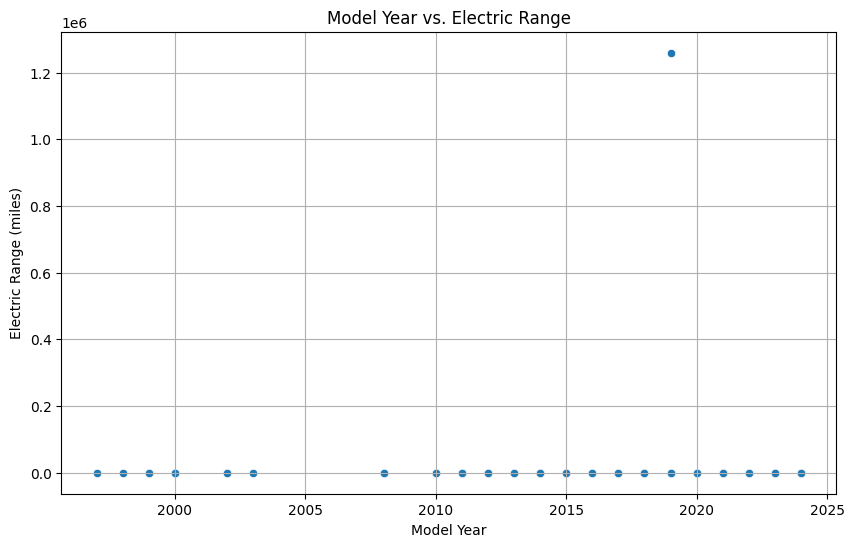

In [ ]:
# Drop rows with null values in 'Model Year' or 'Electric Range' columns
df_cleaned = df.dropna(subset=['Model Year', 'Electric Range'])

# Convert 'Electric Range' to numeric, coercing non-numeric values to NaN
df_cleaned['Electric Range'] = pd.to_numeric(df_cleaned['Electric Range'], errors='coerce')

# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Model Year', y='Electric Range', data=df_cleaned)
plt.title('Model Year vs. Electric Range')
plt.xlabel('Model Year')
plt.ylabel('Electric Range (miles)')
plt.grid(True)
plt.show()

**Functionality:**

- .dropna(subset=['Model Year', 'Electric Range']) drops rows with null values in the specified columns.
- pd.to_numeric() converts the 'Electric Range' column to numeric values, coercing non-numeric values to NaN.
- sns.scatterplot() creates a scatter plot to visualize the relationship between the model year and electric range.

**Output Summary:**

The code effectively handles missing values, converts the 'Electric Range' column to numeric values, and generates a scatter plot to analyze the trend between the model year and electric range of vehicles. This visualization facilitates the examination of any potential correlation between these two variables.

## **20-	Legislative District and MSRP:**



### •	How does the average base MSRP vary across different legislative districts?

In [ ]:
# Group the data by legislative district and calculate the average base MSRP
district_msrp = df.groupby('Legislative District')['Base MSRP'].mean().reset_index()

# Display the average base MSRP for each legislative district
print("Average Base MSRP Across Different Legislative Districts:")
print(district_msrp)

Average Base MSRP Across Different Legislative Districts:
   Legislative District    Base MSRP
0                   1.0   770.965682
1                   2.0  1091.211957
2                   3.0   869.330664
3                   4.0  1257.040816
4                   5.0  1093.072687
..                  ...          ...
87                    5   680.348259
88                    6     0.000000
89                    7  1824.137931
90                    9     0.000000
91                    ?     0.000000

[92 rows x 2 columns]


**Functionality:**

- .groupby('Legislative District')['Base MSRP'].mean() groups the data by legislative district and calculates the mean of the base MSRP for each district.
- .reset_index() resets the index of the resulting DataFrame.
- print() displays the average base MSRP for each legislative district.

**Output Summary:**

The code efficiently computes and displays the average base MSRP across different legislative districts, providing insights into the variation in pricing trends among different regions.